### Generowanie wykresów porównujących cztery modele pod względem AUC oraz czasu trwania uczenia

Import niezbędnych bibliotek, definicja ustawień logowania i stałych

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import dirname, join, abspath
import sys
sys.path.insert(0, abspath(join(dirname('recommender_system'), '..')))

from src.utils.helper import (
    get_newest_existing_model_version,
    unpickle
)

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

BASE_PATH = abspath(join(dirname('recommender_system'), '../../..'))
RESULTS_PATH = f'{BASE_PATH}/results'

Generowanie wykresu porównującego miarę AUC dla czterech modeli

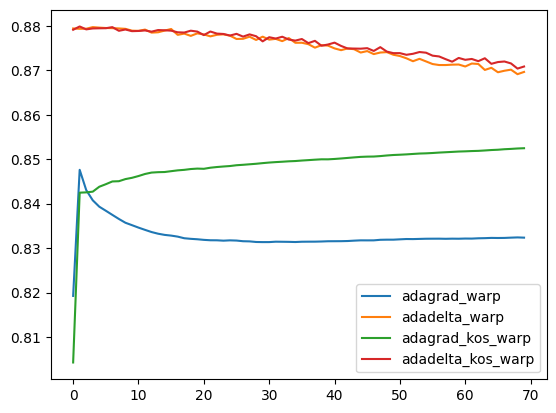

In [3]:
# AUC metrics comparision
model_name = 'adagrad_warp_model'
model_results_path = f'{RESULTS_PATH}/{model_name}'
version = get_newest_existing_model_version(model_results_path)
adagrad_warp_model_auc = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl')

model_name = 'adadelta_warp_model'
adadelta_warp_model_auc = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl')

model_name = 'adagrad_kos_warp_model'
adagrad_kos_warp_model_auc = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl')

model_name = 'adadelta_kos_warp_model'
adadelta_kos_warp_model_auc = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_auc_v{version}.pkl')

x = np.arange(len(adagrad_warp_model_auc))
plt.plot(x, np.array(adagrad_warp_model_auc))
plt.plot(x, np.array(adadelta_warp_model_auc))
plt.plot(x, np.array(adagrad_kos_warp_model_auc))
plt.plot(x, np.array(adadelta_kos_warp_model_auc))
plt.legend(['adagrad_warp', 'adadelta_warp', 'adagrad_kos_warp', 'adadelta_kos_warp'], loc='lower right')
plt.show()

Generowanie wykresu porównującego czas trwania uczenia każdego z czterech modeli

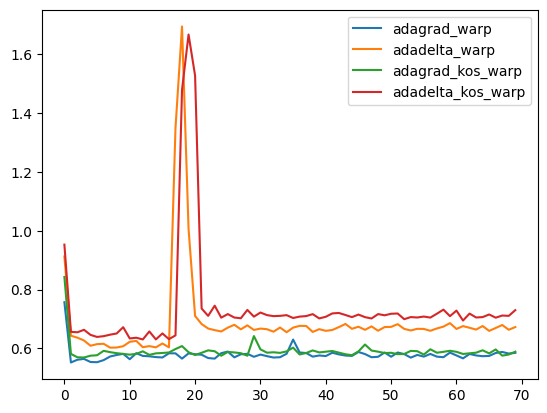

In [4]:
# Duration comparision
model_name = 'adagrad_warp_model'
model_results_path = f'{RESULTS_PATH}/{model_name}'
version = get_newest_existing_model_version(model_results_path)
adagrad_warp_model_duration = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl')

model_name = 'adadelta_warp_model'
adadelta_warp_model_duration = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl')

model_name = 'adagrad_kos_warp_model'
adagrad_kos_warp_model_duration = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl')

model_name = 'adadelta_kos_warp_model'
adadelta_kos_warp_model_duration = unpickle(f'{RESULTS_PATH}/{model_name}/{model_name}_duration_v{version}.pkl')

x = np.arange(len(adagrad_warp_model_duration))
plt.plot(x, np.array(adagrad_warp_model_duration))
plt.plot(x, np.array(adadelta_warp_model_duration))
plt.plot(x, np.array(adagrad_kos_warp_model_duration))
plt.plot(x, np.array(adadelta_kos_warp_model_duration))
plt.legend(['adagrad_warp', 'adadelta_warp', 'adagrad_kos_warp', 'adadelta_kos_warp'], loc='upper right')
plt.show()